In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
data = pd.read_csv("survey.csv")

data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [4]:
data.drop(['Country','state','Timestamp','comments'],axis=1,inplace=True)

In [5]:
data.isnull().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [6]:
data['self_employed'].fillna('No',inplace=True)

In [7]:
data['work_interfere'].fillna('N/A',inplace=True)

<AxesSubplot:>

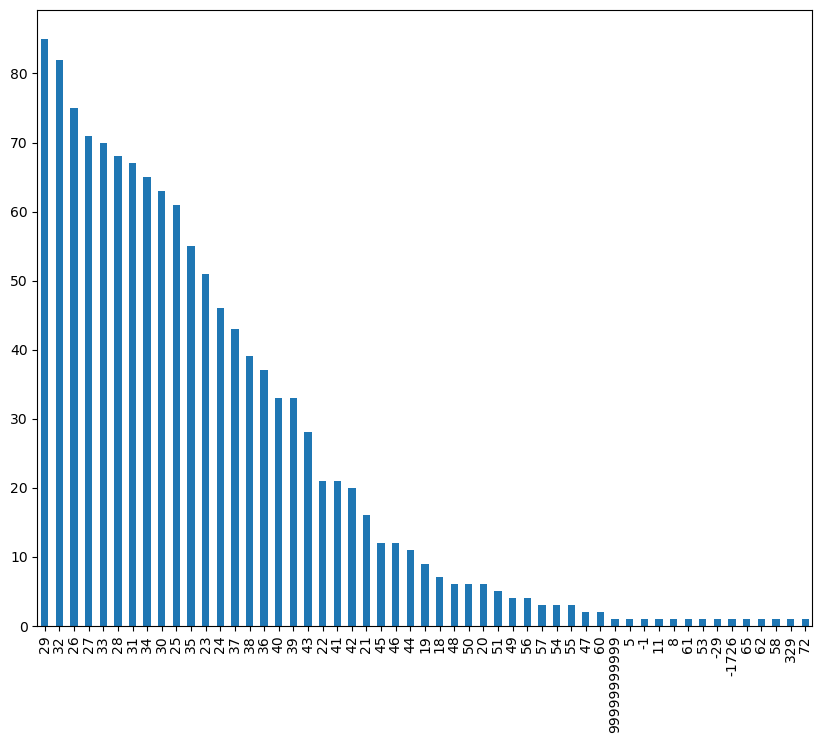

In [8]:
data['Age'].value_counts().plot(kind='bar',figsize=(10,8))

In [9]:
data.drop(data[(data['Age']>60) | (data['Age']<18)].index,inplace=True)

<AxesSubplot:>

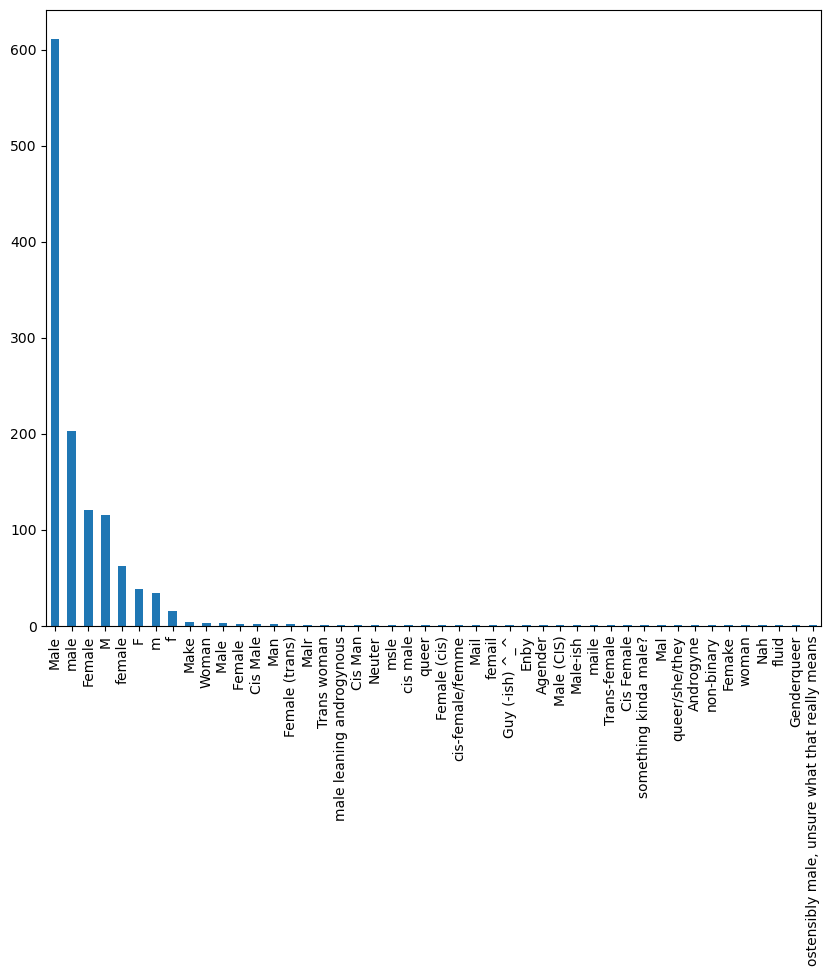

In [10]:
data['Gender'].value_counts().plot(kind='bar',figsize=(10,8))

In [11]:
data['Gender'].value_counts()

Male                                              611
male                                              203
Female                                            120
M                                                 115
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Female                                              2
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Malr                                                1
Trans woman                                         1
male leaning androgynous                            1
Cis Man                     

In [12]:
data['Gender'].replace(['Male','male','M','m','Make','Male','Cis Male','Man','Malr','Mail',
                        'Cis Man','msle','cis male','Mal','maile','Male-ish','Male (CIS)'],'Male',inplace=True)
data['Gender'].replace(['Female','Trans woman','F','f','Woman','Male','Female (cis)','cis-female/femme','femail','Cis Female',
                        'Femake','woman'],'Female',inplace=True)

data['Gender'].replace(['Female (trans)','male leaning androgynous','Neuter','queer','Guy (-ish) ^_^','Enby','Agender','Trans-female','something kinda male?','queer/she/they',
                        'Androgyne','non-binary','fluid','Genderqueer','ostensibly male, unsure what that really means','Nah'],'Non-Binary',inplace=True)


C:\Users\KIIT\AppData\Local\Temp\ipykernel_8852\3252996371.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data["Age"])


Text(0.5, 0, 'Age')

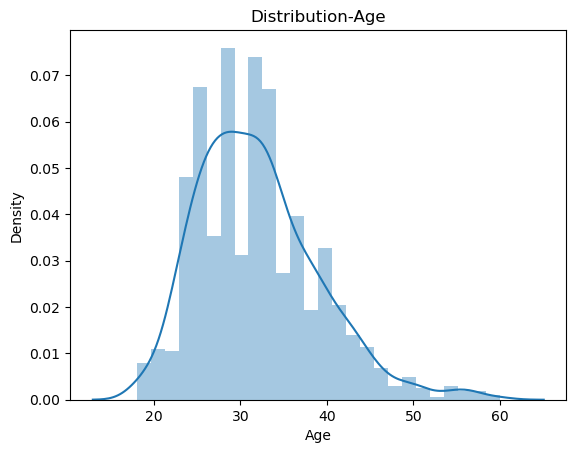

In [13]:
sb.distplot(data["Age"])
plt.title("Distribution-Age")
plt.xlabel("Age")

Text(0.5, 1.0, 'Employement Type')

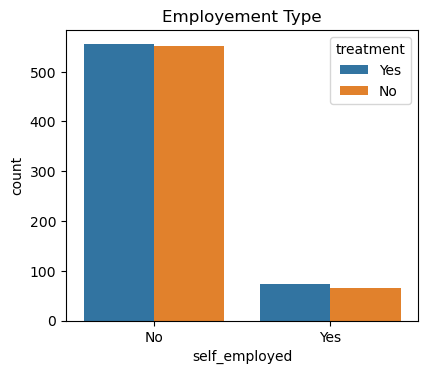

In [17]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,1)
sb.countplot(data=data,x='self_employed',hue = data['treatment'])
plt.title('Employement Type')

Text(0.5, 1.0, 'Employement Type')

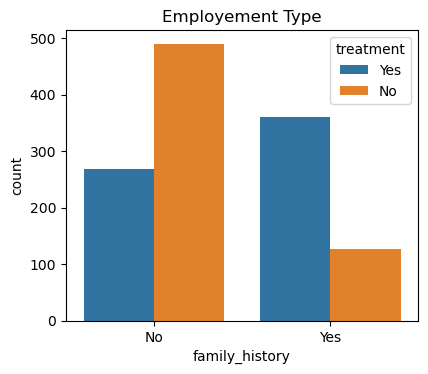

In [18]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,1)
sb.countplot(data=data,x='family_history',hue = data['treatment'])
plt.title('Employement Type')

Text(0.5, 1.0, 'Work Type')

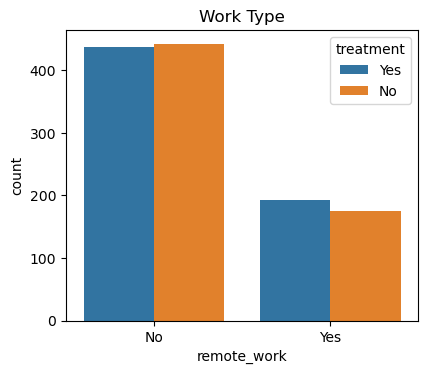

In [20]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,1)
sb.countplot(data=data,x='remote_work',hue = data['treatment'])
plt.title('Work Type')

Text(0.5, 1.0, 'Company')

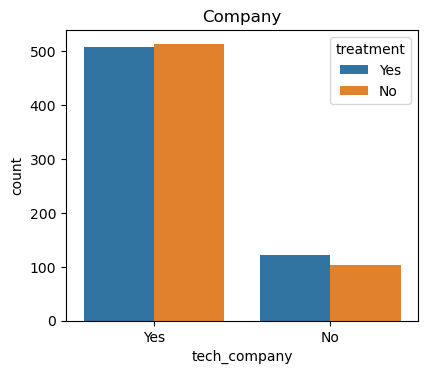

In [22]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,1)
sb.countplot(data=data,x='tech_company',hue = data['treatment'])
plt.title('Company')

Text(0.5, 1.0, 'Benefits')

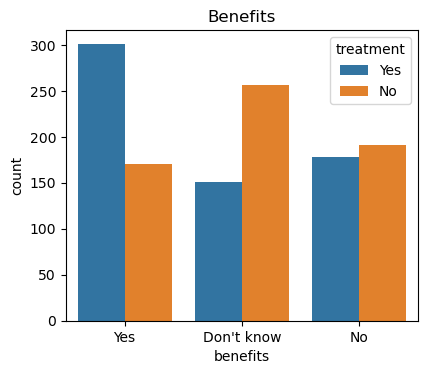

In [23]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,1)
sb.countplot(data=data,x='benefits',hue = data['treatment'])
plt.title('Benefits')

Text(0.5, 1.0, 'Care options')

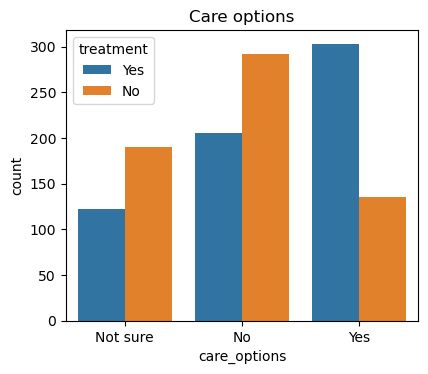

In [24]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,1)
sb.countplot(data=data,x='care_options',hue = data['treatment'])
plt.title('Care options')

Text(0.5, 1.0, 'Equal Importance to Physical and Mental health')

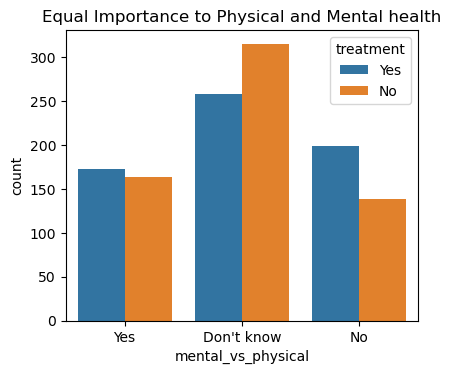

In [25]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,1)
sb.countplot(data=data,x='mental_vs_physical',hue = data['treatment'])
plt.title('Equal Importance to Physical and Mental health')

Text(0.5, 1.0, 'Welness Program')

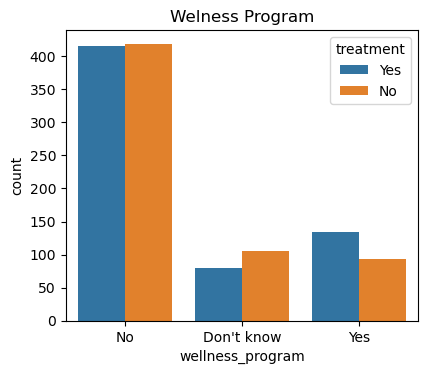

In [27]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,1)
sb.countplot(data=data,x='wellness_program',hue = data['treatment'])
plt.title('Welness Program')

Text(0.5, 1.0, 'Anonymity')

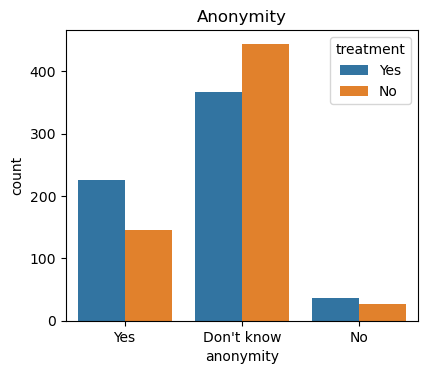

In [28]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,1)
sb.countplot(data=data,x='anonymity',hue = data['treatment'])
plt.title('Anonymity')

Text(0.5, 1.0, 'Mental Health Consequence')

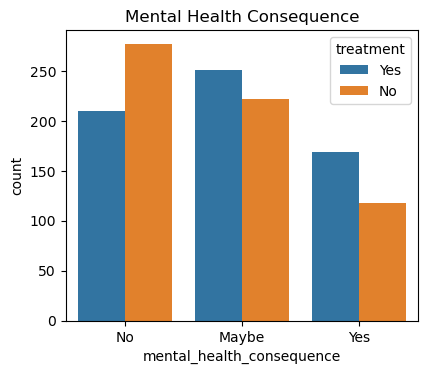

In [29]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,1)
sb.countplot(data=data,x='mental_health_consequence',hue = data['treatment'])
plt.title('Mental Health Consequence')

Text(0.5, 1.0, 'Physical Health Consequence')

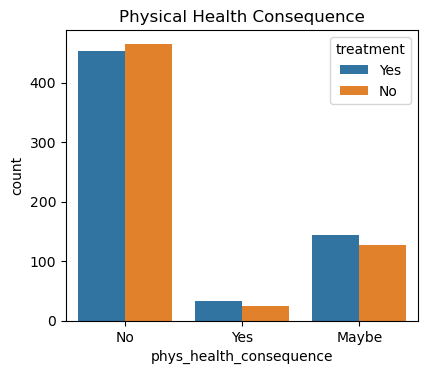

In [30]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,1)
sb.countplot(data=data,x='phys_health_consequence',hue = data['treatment'])
plt.title('Physical Health Consequence')

Text(0.5, 1.0, 'Discussion with coworkers')

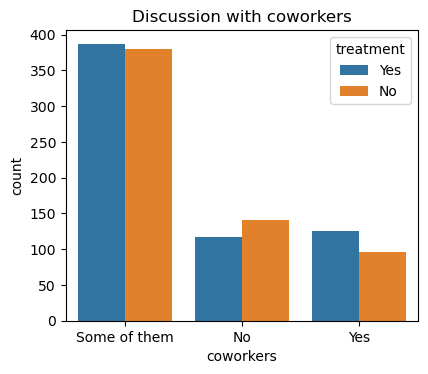

In [31]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,1)
sb.countplot(data=data,x='coworkers',hue = data['treatment'])
plt.title('Discussion with coworkers')

Text(0.5, 1.0, 'Discussion with supervisor')

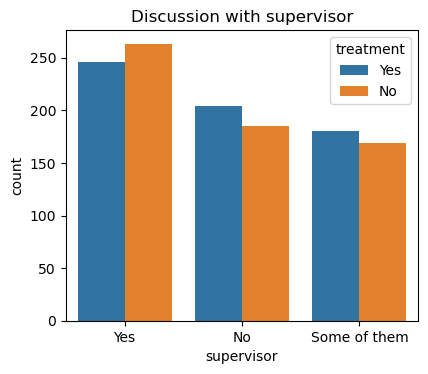

In [32]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,1)
sb.countplot(data=data,x='supervisor',hue = data['treatment'])
plt.title('Discussion with supervisor')

Text(0.5, 1.0, 'Discussion with Interviewer ')

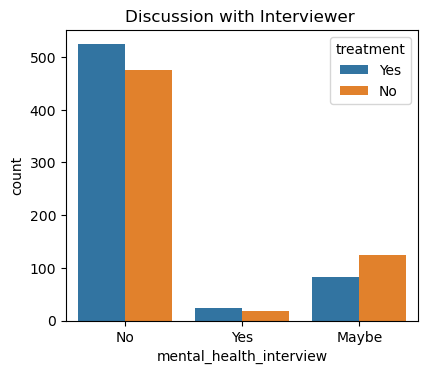

In [33]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,1)
sb.countplot(data=data,x='mental_health_interview',hue = data['treatment'])
plt.title('Discussion with Interviewer ')

Text(0.5, 1.0, 'Consequence after disclosure')

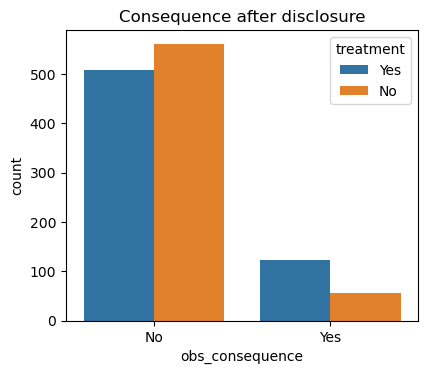

In [34]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,1)
sb.countplot(data=data,x='obs_consequence',hue = data['treatment'])
plt.title('Consequence after disclosure')

In [35]:
X = data.drop('treatment',axis=1)
y= data['treatment']

In [36]:
from sklearn. compose import ColumnTransformer
from sklearn. preprocessing import LabelEncoder , OrdinalEncoder


In [37]:
X = data.drop('treatment',axis=1)
y= data['treatment']

In [38]:
data.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,No,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Female,No,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Female,No,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Female,No,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Female,No,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [42]:
ct = ColumnTransformer([('oe',OrdinalEncoder(),['Gender','self_employed','family_history','work_interfere','no_employees',
                                               'remote_work','tech_company','benefits','care_options','wellness_program',
                                              'seek_help','anonymity','leave','mental_health_consequence','phys_health_consequence',
                                              'coworkers','supervisor','mental_health_interview','phys_health_interview','mental_vs_physical',
                                              'obs_consequence'])],remainder= 'passthrough')

In [43]:
X=ct.fit_transform(X)

In [44]:
le = LabelEncoder()
y = le.fit_transform(y)

In [45]:
import joblib
joblib.dump(ct,'feature_values')

['feature_values']

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=49)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier

# from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report,auc

In [53]:
model_dict={}
model_dict['Logitic regression']=LogisticRegression(solver='liblinear',random_state=49)


model_dict['KNN Classifier']=KNeighborsClassifier()
model_dict['Decision Tree Classifier']=DecisionTreeClassifier(random_state=49)
model_dict['Random Forest Classifier']=RandomForestClassifier(random_state=49)
model_dict['Ada Boost Classifier']=AdaBoostClassifier(random_state=49)
model_dict['Gradient Boosting Classifier']=GradientBoostingClassifier(random_state=49)

In [57]:

def model_test(X_train, X_test, y_train, y_test, model, model_name):
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'==============================={model_name}=============================')
        print(f'Accuracy: {accuracy}')
    except Exception as e:
        print(f'Error while running {model_name}: {e}')


In [58]:
for model_name,model in model_dict.items():
    model_test(X_train,X_test,y_train,y_test,model,model_name)

===============================Logitic regression=============================
Accuracy: 0.848
Error while running KNN Classifier: 'NoneType' object has no attribute 'split'
===============================Decision Tree Classifier=============================
Accuracy: 0.7733333333333333
===============================Random Forest Classifier=============================
Accuracy: 0.832
===============================Ada Boost Classifier=============================
Accuracy: 0.848
===============================Gradient Boosting Classifier=============================
Accuracy: 0.84


In [59]:
abc = AdaBoostClassifier(random_state=99)
abc.fit(X_train,y_train)
pred_abc = abc.predict(X_test)
print('Accuracy of adaboost= ',accuracy_score(y_test,pred_abc))

Accuracy of adaboost=  0.848


In [62]:
from sklearn.model_selection import RandomizedSearchCV
params_abc = {'n_estimators': [int(x) for x in np.linspace(start=1,stop=50,num=15)],
             'learning_rate': [(0.97+x /100) for x in range  (0,8)],
             }
abc_random = RandomizedSearchCV(random_state=49,estimator = abc, param_distributions =  params_abc,n_iter=50,cv=5,n_jobs=-1)

In [63]:
params_abc

{'n_estimators': [1, 4, 8, 11, 15, 18, 22, 25, 29, 32, 36, 39, 43, 46, 50],
 'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04]}

In [64]:
abc_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=99),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.97, 0.98, 0.99, 1.0,
                                                          1.01, 1.02, 1.03,
                                                          1.04],
                                        'n_estimators': [1, 4, 8, 11, 15, 18,
                                                         22, 25, 29, 32, 36, 39,
                                                         43, 46, 50]},
                   random_state=49)

In [65]:
abc_random.best_params_


{'n_estimators': 4, 'learning_rate': 1.0}

In [66]:
abc_tuned = AdaBoostClassifier(random_state=49,n_estimators=11, learning_rate = 1.02)
abc_tuned.fit(X_train,y_train)
pred_abc_tuned = abc_tuned.predict(X_test)
print('Accuracy of Adaboost(tuned)= ',accuracy_score(y_test,pred_abc_tuned))

Accuracy of Adaboost(tuned)=  0.872


Text(50.722222222222214, 0.5, 'Actual')

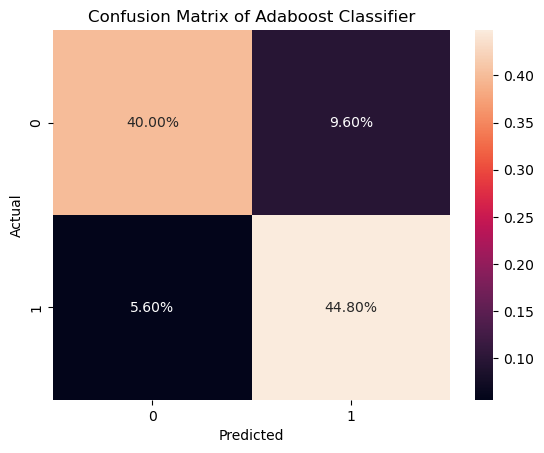

In [68]:
cf_matrix = confusion_matrix (y_test,pred_abc)
sb.heatmap(cf_matrix/np.sum(cf_matrix),annot=True,fmt='.2%')
plt.title('Confusion Matrix of Adaboost Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')

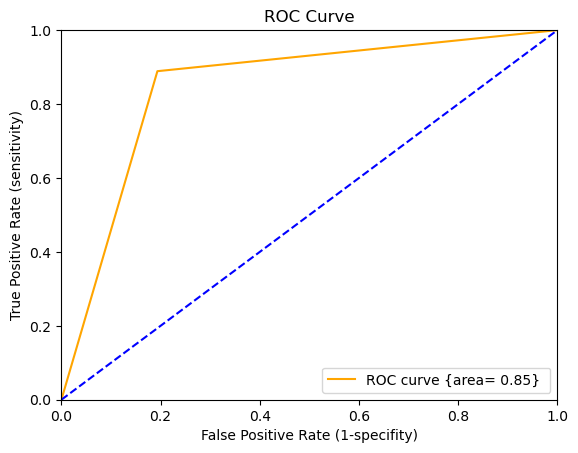

(array([0.        , 0.19354839, 1.        ]),
 array([0.        , 0.88888889, 1.        ]),
 array([2, 1, 0]))

In [73]:
from sklearn import metrics
fpr_abc, tpr_abc,thresholds_abc = roc_curve(y_test,pred_abc)
roc_auc_abc = metrics.auc(fpr_abc,tpr_abc)
plt.plot(fpr_abc,tpr_abc,color='orange',label='ROC curve {area= %0.2f} '% roc_auc_abc)
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1-specifity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.legend(loc="lower right")
plt.show()
roc_curve(y_test,pred_abc)


In [74]:
print(classification_report(y_test,pred_abc))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84       186
           1       0.82      0.89      0.85       189

    accuracy                           0.85       375
   macro avg       0.85      0.85      0.85       375
weighted avg       0.85      0.85      0.85       375



In [75]:
print(classification_report(y_test,pred_abc_tuned))

              precision    recall  f1-score   support

           0       0.93      0.81      0.86       186
           1       0.83      0.94      0.88       189

    accuracy                           0.87       375
   macro avg       0.88      0.87      0.87       375
weighted avg       0.88      0.87      0.87       375



In [78]:
import pickle
pickle.dump('abc_tuned',open('model.pkl','wb'))